In [1]:
%matplotlib inline

In [2]:
import numpy as np
import nibabel as nb
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data_dir = '/home/julia/data/gradients/'
orig = np.load(data_dir + 'results/embedding/embed.npy')[:,:6]
csd = np.load(data_dir + 'results/repro/csd/csd_embed.npy')[:,:6]
ad2 = np.load(data_dir + 'results/repro/ad2/ad2_embed.npy')[:,:6]
ad3 = np.load(data_dir + 'results/repro/ad3/ad3_embed.npy')[:,:6]

In [4]:
sns.set_context('talk')
sns.set_style('white')

In [5]:
surrogates =  np.load(data_dir+'results/null_models/volume/surrogates.npy')

In [7]:
surrogates.shape

(1000, 15422)

In [25]:
csd1_rs = []
for j in range(1000):
    r , p = stats.spearmanr(csd[:,0], surrogates[j,:])
    csd1_rs.append(r)

In [23]:
ad21_rs = []
for j in range(1000):
    r , p = stats.spearmanr(ad2[:,0], surrogates[j,:])
    ad21_rs.append(r)

In [24]:
ad31_rs = []
for j in range(1000):
    r , p = stats.spearmanr(ad3[:,0], surrogates[j,:])
    ad31_rs.append(r)

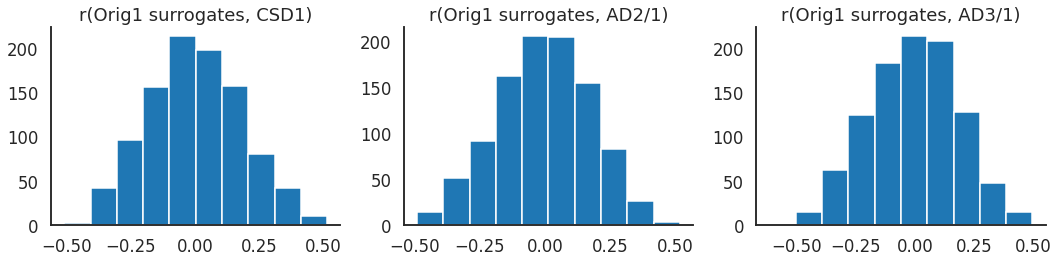

In [29]:
fig = plt.figure(figsize=(15,4))
fig.add_subplot(131)
plt.hist(csd1_rs)
sns.despine()
plt.title("r(Orig1 surrogates, CSD1)")

fig.add_subplot(132)
plt.hist(ad21_rs)
sns.despine()
plt.title("r(Orig1 surrogates, AD2/1)")

fig.add_subplot(133)
plt.hist(ad31_rs)
sns.despine()
plt.title("r(Orig1 surrogates, AD3/1)")
plt.tight_layout()

In [37]:
np.where(np.abs(np.array(csd1_rs)) >= 0.81)

(array([], dtype=int64),)

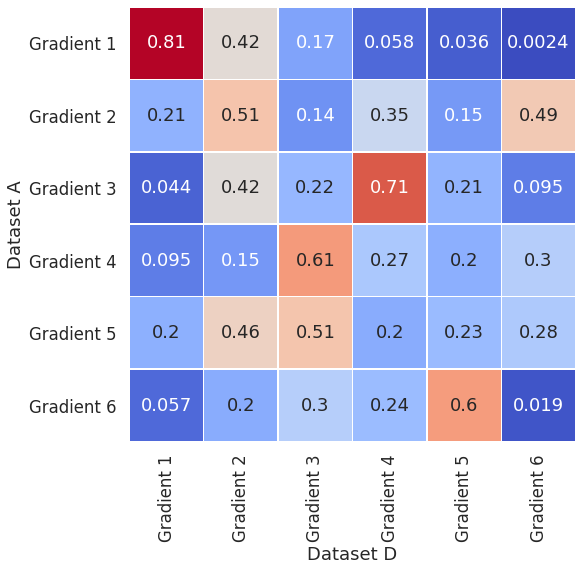

In [57]:
origg = []
reprog = []
rs = []
for i in range(6):
    for j in range(6):   
        r , p = stats.spearmanr(orig[:,i], csd[:,j])
        origg.append('Gradient {}'.format(i+1))
        reprog.append('Gradient {}'.format(j+1))
        rs.append(np.abs(r))
df = pd.DataFrame(columns = ['Dataset A','Dataset D','r'], data=zip(origg, reprog, rs))
df = df.pivot("Dataset A", "Dataset D", "r")
fig = plt.figure(figsize=(8,8))
sns.heatmap(df, annot=True, cbar=False, linewidth=0.5, cmap='coolwarm')

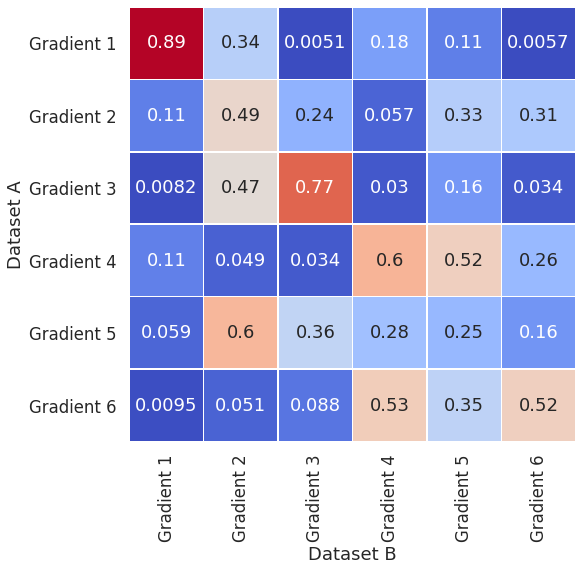

In [56]:
origg = []
reprog = []
rs = []
for i in range(6):
    for j in range(6):   
        r , p = stats.spearmanr(orig[:,i], ad2[:,j])
        origg.append('Gradient {}'.format(i+1))
        reprog.append('Gradient {}'.format(j+1))
        rs.append(np.abs(r))
df = pd.DataFrame(columns = ['Dataset A','Dataset B','r'], data=zip(origg, reprog, rs))
df = df.pivot("Dataset A", "Dataset B", "r")
fig = plt.figure(figsize=(8,8))
sns.heatmap(df, annot=True, cbar=False, linewidth=0.5,  cmap='coolwarm')

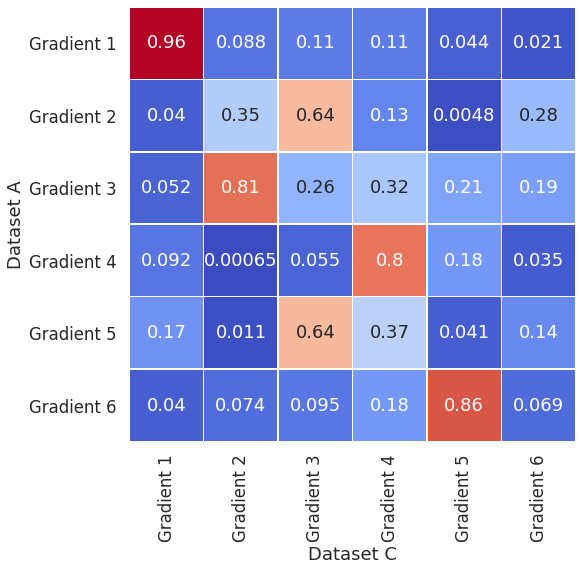

In [59]:
origg = []
reprog = []
rs = []
for i in range(6):
    for j in range(6):   
        r , p = stats.spearmanr(orig[:,i], ad3[:,j])
        origg.append('Gradient {}'.format(i+1))
        reprog.append('Gradient {}'.format(j+1))
        rs.append(np.abs(r))
df = pd.DataFrame(columns = ['Dataset A','Dataset C','r'], data=zip(origg, reprog, rs))
df = df.pivot("Dataset A", "Dataset C", "r")
fig = plt.figure(figsize=(8,8))
sns.heatmap(df, annot=True, cbar=False, linewidth=0.5,  cmap='coolwarm')